# City Size Distribution Analysis

This note book produces Lorenz Curves and Zipf Law Estimations, along with gini coefficents.

Code adapted for Lorzen curves from: https://zhiyzuo.github.io/Plot-Lorenz/

-Cascade 2019-02-04

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
from scipy import stats as ss

## Data In

In [2]:
# File paths

data_raw = '../../data/raw/'
data_temp = '../../temp_data/'
data_interim = '../../interim/'
data_analysis = '../../temp_data/ERL_data/Data20190222/'
erl_data = '../../temp_data/ERL_data/'
downloads = '/Users/cascade/Downloads/'

In [3]:
# Data

# GHS2000 = gpd.read_file(erl_data+'Data20190222/GHS_POP_GPW42000_final20190122.shp')
# GHS2015 = gpd.read_file(erl_data+'Data20190222/GHS_POP_GPW42015_final20190122.shp')
# WP2000 = gpd.read_file(erl_data+'Data20190222/AFR_PPP_2000_adj_v2_final20190122.shp')
# WP2015 = gpd.read_file(erl_data+'Data20190222/AFR_PPP_2015_adj_v2_final20190122.shp')
# LS2015 = gpd.read_file(erl_data+'Data20190222/WPE_1KM_2016_final20190122.shp')
# WPE2016 = gpd.read_file(erl_data+'Data20190222/LS15_final20190122.shp')

# Data with Rain Zones & Regions & FIDs Dropped (2019-02-13)

# GHS2000 = gpd.read_file(erl_data+'GHS_POP_GPW42000_20190213.shp')
# GHS2015 = gpd.read_file(erl_data+'GHS_POP_GPW42015_20190213.shp')
# WP2000 = gpd.read_file(erl_data+'AFR_PPP_2000_adj_v2_20190213.shp')
# WP2015 = gpd.read_file(erl_data+'AFR_PPP_2015_adj_v2_20190213.shp')
# LS2015 = gpd.read_file(erl_data+'WPE_1KM_2016_20190213.shp')
# WPE2016 = gpd.read_file(erl_data+'LS15_20190213.shp')

# Load data: ...20190222.shp files have FIDs removed, S Sudan added, rainfall zones, and regions

GHS2000 = gpd.read_file(data_analysis+'GHS_POP_GPW42000_20190222.shp', driver = 'ESRI Shapefile')
GHS2015 = gpd.read_file(data_analysis+'GHS_POP_GPW42015_20190222.shp', driver = 'ESRI Shapefile')
WP2000 = gpd.read_file(data_analysis+'AFR_PPP_2000_adj_v2_20190222.shp', driver = 'ESRI Shapefile')
WP2015 = gpd.read_file(data_analysis+'AFR_PPP_2015_adj_v2_20190222.shp', driver = 'ESRI Shapefile')
LS2015 = gpd.read_file(data_analysis+'WPE_1KM_2016_20190222.shp', driver = 'ESRI Shapefile')
WPE2016 = gpd.read_file(data_analysis+'LS15_20190222.shp', driver = 'ESRI Shapefile')

In [4]:
# List of datasets

datasets_in = [GHS2000, GHS2015, WP2000, WP2015, LS2015, WPE2016]
datasets_in15 = [GHS2015, WP2015, LS2015, WPE2016]

In [5]:
for dataset in datasets_in:
    print(len(dataset))

4220
4484
2078
2428
3726
3892


## Functions

In [209]:
def gini(series):
    
    "Function calculates gini coefficent based on https://zhiyzuo.github.io/Plot-Lorenz/"
    ## series to array
    arr = series.values
    
    ## first sort
    sorted_arr = arr.copy(np.array)
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [120]:
def lorenz_curve(X):
    
    "Function plots Lorenz curves based on https://zhiyzuo.github.io/Plot-Lorenz/"
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

In [9]:
def gini_group(gpd_df, group, value, outcol):
    "Function calculates gini coef. for by groups for a pandas data frame. Returns data frame"
    
    gini = test.groupby(group).value.agg(gini)
    df = pd.DataFrame()
    df[group] = out.keys()
    df[outcol] = out.values

    return df

In [259]:
def gini_alt(series):
    
    "Function calculates gini coefficent based on https://www.jstor.org/stable/pdf/177185.pdf "
    
    arr = series.values
    
    # first sort
    sorted_arr = arr.copy(np.array)
    sorted_arr.sort()
    
    # parameters
    n = arr.size
    est_ = (n**2)*sorted_arr.mean()
    
    # equation
    sum([ (i+1) *yi  for i, yi in enumerate(sorted_arr)])
    
    weighted_sum = sum([(((2.* (i+1)) - (n) - 1) * yi) for i, yi in enumerate(sorted_arr)])
    
    # for unbiased estimator use
    # const_ = (n / (n - 1.))
    # return weighted_sum / est_ * const_
    
    return weighted_sum / est_

## Plots

In [ ]:
# Select Data for Lorenz

# All Africa

#area = 'Africa'
# X = np.sort(np.array(GHS2000.PopTot))
# Y = np.sort(np.array(GHS2015.PopTot))

# # By group
col = 'rain_zone' # column
area = 'Humid' # geography to distribut 

X = np.sort(np.array(GHS2000[GHS2000[col] == area].PopTot))
Y = np.sort(np.array(GHS2015[GHS2015[col] == area].PopTot))


print(len(X))
print(len(Y))

# Set Limits
X = X[(X < 5*10**6)]
Y = Y[(Y < 5*10**6)]

print(len(X))
print(len(Y))

# Data for curve one
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

# Data for curve two 
Y_lorenz = Y.cumsum() / Y.sum()
Y_lorenz = np.insert(Y_lorenz, 0, 0)
Y_lorenz[0], Y_lorenz[-1]

In [ ]:
df = pd.DataFrame()
df['pop'] = np.insert(Y, 0,0)
df['pct'] = Y_lorenz
df['rank'] = np.arange(Y_lorenz.size)/(Y_lorenz.size-1)
df.iloc[560:]

In [ ]:
# Lorenz Curve Plot

%matplotlib inline

## Size & number
sns.set(font_scale=3)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))


# Curve Plots
# Alpha for Botswana and S. Leone is 0.7, else 0.5
ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='Green', s=100, alpha = 0.7)

ax1.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
           marker='.', color='#ff01bc', s=100, alpha = 0.7)

# Title
plt.title(area)


# Legend
leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
plt.legend(leg,loc=2, markerscale=3)

## line plot of of 90% 40% 
# ax1.plot([0.9,0.9], [0,1] , color='k', alpha = 0.25)
# ax1.plot([0,1], [0.3,0.3] , color='k', alpha = 0.25)

#remove ticks
# ax.set_xticks([])
# ax.set_yticks([])

# Set Color
plt.grid(b=True, color = 'k', alpha = 0.5, marker = '.')

# plt.setp(ax1.xaxis.get_gridlines(), clip_path = [0,1])
# plt.setp(ax1.yaxis.get_gridlines(), clip_path = [[0,0], [1,1]])
plt.figure.frameon = True
ax1.set_facecolor('White')


fig.savefig('/Users/cascade/Desktop/'+area+'_Lorenz.png', dpi=700)



In [75]:
# Select Data Zipf's law

# All Africa
# area = 'Africa'
# data1 = np.sort(np.array(GHS2000.PopTot))
# data2 = np.sort(np.array(GHS2015.PopTot))

# By country 
col = 'country' # column
area = 'Ethiopia' # geography to distribut 

data1 = np.sort(np.array(GHS2000[GHS2000[col] == area].PopTot))
data2 = np.sort(np.array(GHS2015[GHS2015[col] == area].PopTot))

print(len(data1))
print(len(data2))

# Set Limits
data1 = data1[(data1 < 5*10**6)]
data2 = data2[(data2 < 5*10**6)]

print(len(data1))
print(len(data2))

X1_zipf = data1 #sort the values
Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
Y1_zipf = Y1_zipf[::-1] # Re order range

X1_zipf_log = np.log(X1_zipf)
Y1_zipf_log = np.log(Y1_zipf)

X2_zipf = data2
Y2_zipf = list(range(1, len(X2_zipf)+1))
Y2_zipf = Y2_zipf[::-1]

X2_zipf_log = np.log(X2_zipf)
Y2_zipf_log = np.log(Y2_zipf)

338
395
338
395


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


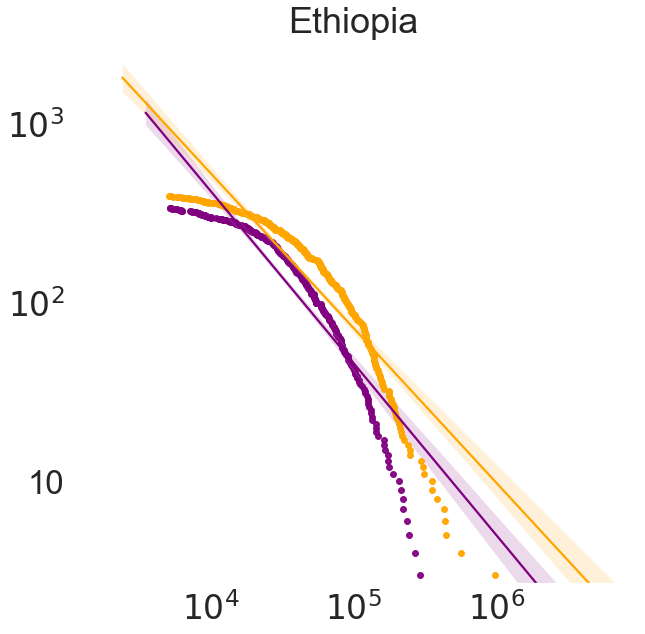

In [76]:
# Zipf's law

## Size & number
sns.set(font_scale=3)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))

# Plot
plt.scatter(X1_zipf_log, Y1_zipf_log , marker='.', color='purple', s=100, alpha = 0.7)
plt.scatter(X2_zipf_log, Y2_zipf_log , marker='.', color='orange', s=100, alpha = 0.7)

# Legend
# leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
# plt.legend(leg,loc=1, markerscale=3, facecolor = 'white', edgecolor = 'white')

# Fit Lines
sns.regplot(X1_zipf_log, Y1_zipf_log, color = 'purple')
sns.regplot(X2_zipf_log, Y2_zipf_log, color = 'orange')

# Title
plt.title(area)

# Labels
plt.xlabel('')
plt.ylabel('')

# Set Ticks
plt.xticks([np.log(10**4), np.log(10**5), np.log(10**6), np.log(10**7)], 
           ['$10^4$', '$10^5$', '$10^6$', '$10^7$'])

plt.yticks([np.log(10), np.log(100), np.log(1000), np.log(10000),  np.log(100000)], 
           ['10', '$10^2$', '$10^3$', '$10^4$', '$10^5$'])

# Set Background Color
ax1.set_facecolor('White')

axes = plt.gca()
axes.set_xlim([7,16])
#axes.set_xlim([min(X2_zipf_log), max(X2_zipf_log)])
axes.set_ylim([1,8])

fig.savefig('/Users/cascade/Desktop/'+area+'_Zipf.png', dpi=700)

## Analysis

In [17]:
# Subset of Countries 
# countries = ['Morocco', 'Mali', 'Senegal', 'Sierra Leone', 'Ghana',
#             'Nigeria', 'Central African Republic', 'South Sudan',
#             'Uganda', 'Kenya', 'Ethiopia', 'Angola', 'Botswana',
#             'Zambia', 'South Africa']

countries = ['Mali', 'Ghana', 'Nigeria', 'Kenya', 'Ethiopia', 'Botswana',
            'Zambia', 'South Africa']

In [260]:
# Gini Checn 

for country in countries: 
    
    print(country)

    test1 = GHS2000[GHS2000['country'] == country]
    test1 = test1[test1.PopTot <5*10**6]
    test2 = GHS2015[GHS2015['country'] == country]
    test2 = test2[test2.PopTot <5*10**6]
    
    # gini coef. 
    print(gini((test1.PopTot)))
    print(gini((test2.PopTot)))
    
    print(gini_alt((test1.PopTot)))
    print(gini_alt((test2.PopTot)))
    

Mali
0.6108782955039849
0.7164657145184983
0.6108782955039849
0.7164657145184982
Ghana
0.6906064873257425
0.7700491057254857
0.6906064873257424
0.7700491057254857
Nigeria
0.7033706955846382
0.7088897642781433
0.7033706955846383
0.708889764278144
Kenya
0.8032027146122462
0.7780787175709349
0.8032027146122462
0.7780787175709349
Ethiopia
0.5314698321498226
0.5875220731276363
0.5314698321498225
0.5875220731276364
Botswana
0.454059354134857
0.37256214947436495
0.454059354134857
0.37256214947436506
Zambia
0.6035522646230338
0.6514300065587337
0.6035522646230339
0.6514300065587336
South Africa
0.7436146844047025
0.7576368665829967
0.7436146844047025
0.7576368665829968


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  


In [257]:
# Decriptives

for country in countries: 
    
    print(country)

    test1 = GHS2000[GHS2000['country'] == country]
    test1 = test1[test1.PopTot <5*10**6]
    test2 = GHS2015[GHS2015['country'] == country]
    test2 = test2[test2.PopTot <5*10**6]
    
    print(test1.PopTot.count())
    print(test2.PopTot.count())
    print(test1.PopTot.median())
    print(test2.PopTot.median())
    
    # gini coef. 
    print(gini((test1.PopTot)))
    print(gini((test2.PopTot)))

Mali
157
186
11893.61264038086
13902.646545410156
0.6108782955039849
0.7164657145184983
Ghana
227
218
19710.7421875
21813.060302734375
0.6906064873257425
0.7700491057254857
Nigeria
313
309
47794.46502685547
62549.62283325195
0.7033706955846382
0.7088897642781433
Kenya
119
125
20530.794494628906
27990.63543701172
0.8032027146122462
0.7780787175709349
Ethiopia
338
395
34785.132080078125
44010.26153564453
0.5314698321498226
0.5875220731276363
Botswana
19
16
48727.512145996094
61391.56742095947
0.454059354134857
0.37256214947436495
Zambia
54
55
52955.20489501953
63491.293029785156
0.6035522646230338
0.6514300065587337
South Africa
304
330
17868.781616210938
20074.99281311035
0.7436146844047025
0.7576368665829967


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  


In [18]:
for country in countries: 
    data1 = np.sort(np.array(GHS2000[GHS2000['country'] == country].PopTot))
    data2 = np.sort(np.array(GHS2015[GHS2015['country'] == country].PopTot))
    
    # Order the data for Zipf's law
    X1_zipf = data1 #sort the values
    Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
    Y1_zipf = Y1_zipf[::-1] # Re order range

    X1_zipf_log = np.log(X1_zipf)
    Y1_zipf_log = np.log(Y1_zipf)

    X2_zipf = data2
    Y2_zipf = list(range(1, len(X2_zipf)+1))
    Y2_zipf = Y2_zipf[::-1]

    X2_zipf_log = np.log(X2_zipf)
    Y2_zipf_log = np.log(Y2_zipf)
    
    fit1 = ss.linregress(X1_zipf_log, Y1_zipf_log)
    fit2 = ss.linregress(X2_zipf_log, Y2_zipf_log)

    print(country)
    print(fit1[0]) # Slope 2000
    print(fit1[2]) # R2 2000
    print(fit1[4]) # p val 2000
    print(fit2[0]) # Slope 2015
    print(fit2[2]) # R2 2000
    print(fit2[4]) # p val 2015

Mali
-1.1576880009061385
-0.985646308676832
0.015927122880549618
-0.9942876338676249
-0.9864385850988008
0.012196160970054973
Ghana
-0.8905044486821306
-0.9705554962029499
0.014734008502443881
-0.8181063857298773
-0.9712868349863866
0.013634865207040088
Nigeria
-0.7157451424470835
-0.9535781884989043
0.01281735304379978
-0.6190849944196499
-0.9510156069953659
0.011448342951896817
Kenya
-0.7220487907607783
-0.9948459100520003
0.006803751911797741
-0.6538601668808498
-0.989991321619025
0.008370600383722466
Ethiopia
-0.9615909514238148
-0.9201097466065093
0.022330118281020352
-0.865144294667185
-0.9252927248421565
0.017887224528347404
Botswana
-0.6202027235118525
-0.8623606115687809
0.08831277927169089
-0.9707267568202914
-0.9146785305542778
0.11464142990681016
Zambia
-0.7178956799289022
-0.9230460602277777
0.04149029931484246
-0.6996878012291149
-0.9254379372901237
0.03934982341327347
South Africa
-0.813046463539664
-0.9941776636668245
0.005062448494539336
-0.7784001477723509
-0.99212354

In [ ]:
bigcity = GHS2015[GHS2015.PopTot >= 5*10**6]

city = GHS2000[GHS2000['country'] == 'Tanzania']
city.sort_values('PopTot', ascending = False)

In [11]:
# All Africa

test1 = GHS2000
test2 = GHS2015

print(test1.PopTot.count())
print(test2.PopTot.count())
print(test1.PopTot.median())
print(test2.PopTot.median())

# gini coef. 
print(gini((test1.PopTot)))
print(gini((test2.PopTot)))

4220
4484
22897.474807739258
28439.200973510742
0.7621134886458019
0.7984894064287189


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  


In [19]:
# All Africa 

data1 = np.sort(np.array(GHS2000.PopTot))
data2 = np.sort(np.array(GHS2015.PopTot))

# Order the data for Zipf's law
X1_zipf = data1 #sort the values
Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
Y1_zipf = Y1_zipf[::-1] # Re order range

X1_zipf_log = np.log(X1_zipf)
Y1_zipf_log = np.log(Y1_zipf)

X2_zipf = data2
Y2_zipf = list(range(1, len(X2_zipf)+1))
Y2_zipf = Y2_zipf[::-1]

X2_zipf_log = np.log(X2_zipf)
Y2_zipf_log = np.log(Y2_zipf)

fit1 = ss.linregress(X1_zipf_log, Y1_zipf_log)
fit2 = ss.linregress(X2_zipf_log, Y2_zipf_log)

print('Africa')
print(fit1[0]) # Slope 2000
print(fit1[2]) # R2 2000
print(fit1[4]) # p val 2000
print(fit2[0]) # Slope 2015
print(fit2[2]) # R2 2000
print(fit2[4]) # p val 2015

Africa
-0.8436955015985173
-0.9808856829681366
0.0025770518065981176
-0.7825630653795841
-0.9767802348279173
0.0025638621098263976


In [15]:
fit1

LinregressResult(slope=-0.8436955015985173, intercept=15.965878880519895, rvalue=-0.9808856829681366, pvalue=0.0, stderr=0.0025770518065981176)

In [ ]:


rain = GHS2015[GHS2015['rain_zone'] == 'Arid']
rain = rain[rain.PopTot < 5*10**6]

gini(rain.PopTot)

# Old Code

In [ ]:
# test = GHS2000[GHS2000['PopTot'] < 5*10**6]
# out = test.groupby('country').PopTot.agg(gini)
# gini2015_df['gini-00'] = out.values

In [ ]:
# gini2015_df = pd.DataFrame()
# gini2015_df['country'] = out.keys()
# gini2015_df['gini-15'] = out.values

In [ ]:
# out.keys()

In [ ]:
# gini2015_df['gini-dif'] = gini2015_df['gini-15'] - gini2015_df['gini-00']

In [ ]:
# gini2015_df

In [ ]:
# fao_ag = pd.read_csv(data_temp+'Macro-Statistics_Key_Indicators_E_Africa.csv')

In [ ]:
# Value added as share gpd 2010 prices

# value = fao_ag.loc[(fao_ag['Item Code'] == 22016) & (fao_ag['Element Code'] == 6169)]

In [ ]:
# ag2000_df = value.filter(['Area', 'Y2000'])
# ag2000_df.columns = ag_df.columns.str.replace('Area', 'country')

In [ ]:
# ag_result = pd.merge(ag2000_df, ag2015_df, on='country', how='inner')
# ag_result

In [ ]:
# result = pd.merge(gini_df, ag_df, on='country', how='inner')

In [ ]:
# plt.scatter(result.gini, result.Y2015, marker='.', color='Red', s=100, alpha = 0.5)
# plt.xlabel('Urban Settlement Gini Coeff by Country 2015')
# plt.ylabel('Value added by Agriculture as Share of GDP')